<h1>Exploratory Data Analysis - part 4</h1>

<h4> Goal : - What are the main characteristics which have the most impact on the car price?</h4>

<h2>Import Data </h2>

 Import libraries 

In [1]:
import pandas as pd


 load data and store in dataframe df:

In [2]:
path='car.csv'
df = pd.read_csv(path)
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,0,0,3,alfa-romero,gas,std,2,convertible,rwd,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,1,1,1,3,alfa-romero,gas,std,2,convertible,rwd,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,2,2,2,1,alfa-romero,gas,std,2,hatchback,rwd,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,3,3,3,2,audi,gas,std,4,sedan,fwd,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,4,4,4,2,audi,gas,std,4,sedan,4wd,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [42]:
df.describe(include=['object']).T

,count,unique,top,freq
make,205,22,toyota,32
fuel-type,205,2,gas,185
aspiration,205,2,std,168
body-style,205,5,sedan,96
drive-wheels,205,3,fwd,120
engine-location,205,2,front,202
engine-type,205,7,ohc,148
num-of-cylinders,205,7,four,159
fuel-system,205,8,mpfi,94


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [64]:
df['make'].value_counts()

toyota           32
nissan           18
mazda            17
honda            13
mitsubishi       13
subaru           12
volkswagen       12
volvo            11
peugot           11
dodge             9
bmw               8
mercedes-benz     8
plymouth          7
audi              7
saab              6
porsche           5
isuzu             4
chevrolet         3
alfa-romero       3
jaguar            3
renault           2
mercury           1
Name: make, dtype: int64

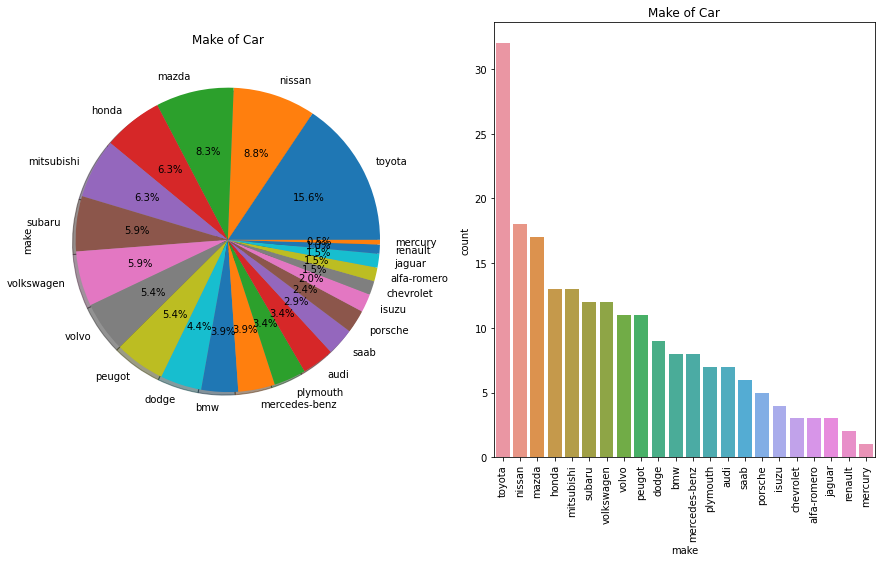

In [63]:
f,ax=plt.subplots(1,2,figsize=(15,8))
df['make'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Make of Car')
sns.countplot('make',data=df,ax=ax[1],order=df['make'].value_counts().index)
ax[1].set_title('Make of Car')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
plt.show()



In [65]:
df['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

We have more Japanese Cars in the Dataset followed by European

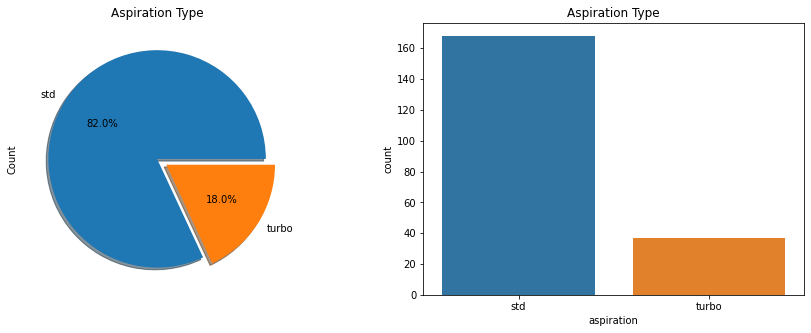

In [40]:
f,ax=plt.subplots(1,2,figsize=(15,5))
df['aspiration'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Aspiration Type')
ax[0].set_ylabel('Count')
sns.countplot('aspiration',data=df,ax=ax[1],order=df['aspiration'].value_counts().index)
ax[1].set_title('Aspiration Type')
plt.show()

Most vehicle have standard Aspiration.The reason is this data set is very old.Now a days most vehicles have turbo system which improves efficiency and power output from an engine.

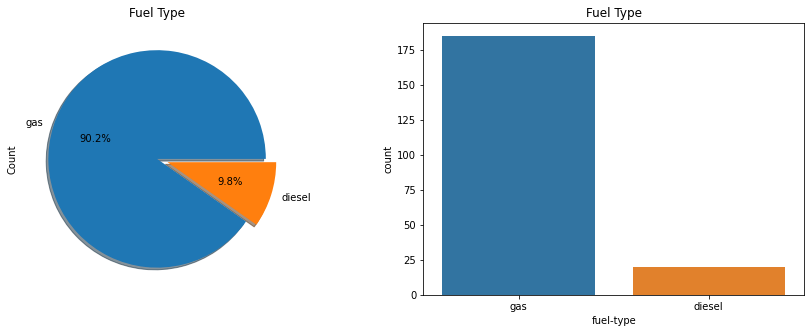

In [41]:
f,ax=plt.subplots(1,2,figsize=(15,5))
df['fuel-type'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Fuel Type')
ax[0].set_ylabel('Count')
sns.countplot('fuel-type',data=df,ax=ax[1],order=df['fuel-type'].value_counts().index)
ax[1].set_title('Fuel Type')
plt.show()

We can see that 90% of the cars in the Data Set are Petrol.US is a Gasoline market unlike Europe and India which have more Share of Diesel Cars

Understanding the range of important features - univariate analysis

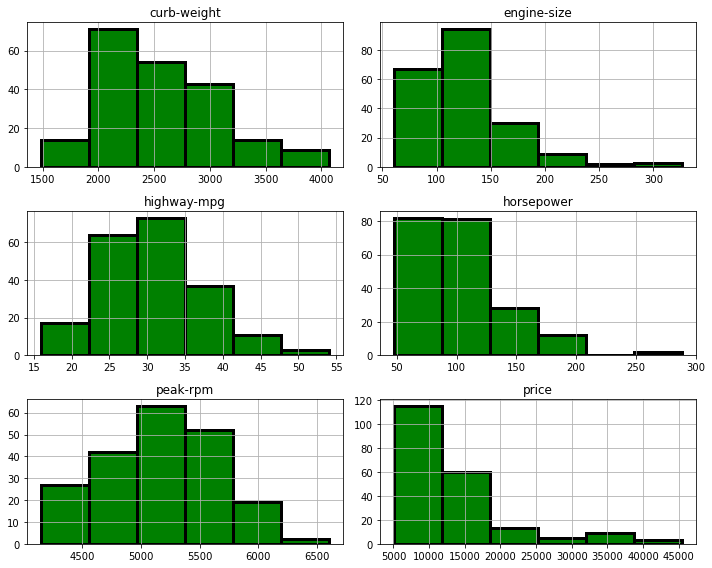

In [75]:
df[['engine-size','peak-rpm','curb-weight','horsepower','price','highway-mpg']].hist(figsize=(10,8),bins=6,color='g',linewidth='3',edgecolor='k')
plt.tight_layout()
plt.show()

1.Curb weight: Is the total weight of the vehicle without the weight of the passenger.It includes weight of coolants,oil and fuel.Defination of curb weight may vary based on the standard adopted by a country.In this data set the curb weight of most cars is in the range 2000-3100 lbs.

2.Engine Size: The size of an engine is measured in cubic centimetres (cc) and refers to the total volume of air and fuel that's pushed through the engine by its cylinders. For example, a 1,000cc engine has the capacity to displace one litre - or 1,000 cubic centimetres - of this air-fuel mixture.

It is usually expressed using the metric units of cubic centimetres  or litres or – particularly in the United States  – cubic inches (CID, cu in, or in3).

1000
 
cubic centimetre
 = 
61.0237
 
Cubic inch

In this dataset it is ranges from  is inrange 60 to 190.

3.Highway-mpg: It is the amount of miles the car travels with one gallon of fuel.

4.Horse Power: It is the measure of the power of the engine.Most vehicle has horsepower 50 to 125

5.Peak rpm: RPM (Reolutions per minute) is the measure of the speed of roation of Engine per minute. It is mostly distributed between 4600 to 5700

6.Price: This is a old data so it shows very low car prices.Most Vehicle are in price range 5000 to 18000

<h3>Heat Maps</h3>

Heat Map from pivot table


Correlation Heat Map

Plotting heat map to understand correlations between diffeent features

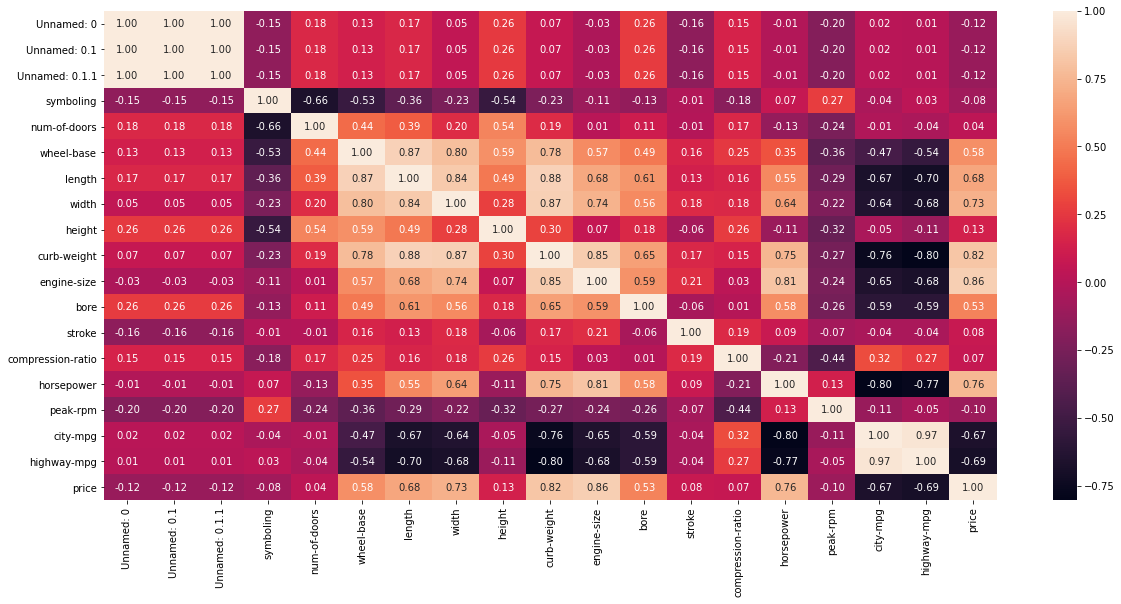

In [77]:
import seaborn as sns
corr = df.corr()
plt.figure(figsize=(20,9))
a = sns.heatmap(corr, annot=True, fmt='.2f')

Findings

curb-size, engine-size, horsepower are positively corelated
city-mpg,highway-mpg are negatively corelated

From a Pair plot we can try to Vizualise the correlation of parameters

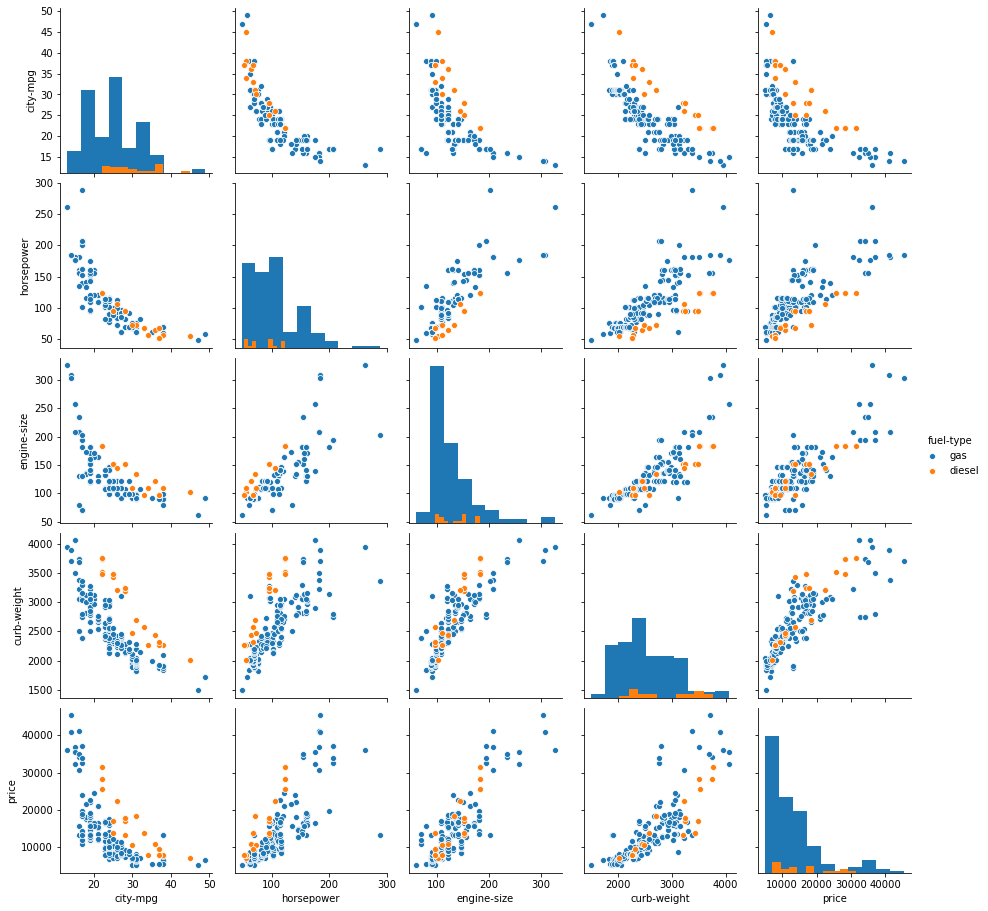

In [79]:
g = sns.pairplot(df[["city-mpg", "horsepower", "engine-size", "curb-weight","price", "fuel-type"]], hue="fuel-type", diag_kind="hist")

Findings

Vehicle Mileage decrease as increase in Horsepower , engine-size, Curb Weight
As horsepower increase the engine size increases
Curbweight increases with the increase in Engine Size
Price Analysis

engine size and curb-weight is positively co realted with price
city-mpg is negatively corelated with price as increase horsepower reduces the mileage

1.Vehicle with high price have low mileage.This because high priced vehicles go into luxary segment which are meant for high performance and running cost is not very important in this segment.

2.As the engine power(horse power) increases the price of the vehicle increases.More horse power also means bigger engine size

3.As the engine size increases the price of the vehicle increases.Weight of the engine increases with the increase in engine size.

4.High curb weight increases price of the vehicle and decreases the mileage of the vehicle.

5.Width has very good positive correlation to the price of the vehicle.

ANNOVA TEST

<h3>Conclusion: Important Variables</h3>

<p>We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:</p>

Continuous numerical variables:
<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>
    
Categorical variables:
<ul>
    <li>Drive-wheels</li>
</ul>

<p>As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.</p>

<h1>Thank you</h1>